# First Neural Network with Keras
In this tutorial, you will build your first **multilayer perceptron (MLP)** model (also your first neural network) in Python with Keras. As you will see, Keras is a easy-to-use deep API that allows you to easily build, train, evaluate and execute deep learning models. 

## 1. Load the dataset
In this tutorial, we are going to use Pima Indians Diabetes dataset which is a standard machine learning dataset from the UCI Machine Learning repository. The dataset can be downloaded from <a href="https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv" target="_blank">here</a>. Place it in the same location as this notebook file.

This is a comparably small dataset, with 768 samples in total. There are eight input features (X) and one output variable (y).

Input features (X):

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)

Output Variables (y):

1. Class label (1 for diabetes, 0 for not)

First we need import all necessory libraries which we will need to work upon.

In [2]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

Here we use `numpy` function `loadtxt` to load the CSV file. In the file, each row corresponds to one example, with nine columns. We can then split them into the input features (X) and output labels (y).

In [3]:
# load the dataset
dataset = loadtxt('pima-indians-diabetes.csv',delimiter=',')
# split into input X and output y variables
X = dataset[:,0:8]
y = dataset[:,8]

Let's print the dimension of X. You may also want to have a look of a few samples.

In [4]:
print(X.shape)
for i in range(5):
    print(dataset[i])

(768, 8)
[  6.    148.     72.     35.      0.     33.6     0.627  50.      1.   ]
[ 1.    85.    66.    29.     0.    26.6    0.351 31.     0.   ]
[  8.    183.     64.      0.      0.     23.3     0.672  32.      1.   ]
[ 1.    89.    66.    23.    94.    28.1    0.167 21.     0.   ]
[  0.    137.     40.     35.    168.     43.1     2.288  33.      1.   ]


Let's split them into training set and test set by using the `train_test_split( )` method from `sklearn`. `test_size = 0.2` means 20% examples are used for test. 

You must **treat the test set as unseen data**, which means any model adjustment must be done only on the training set. 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## 2. Prepare the data
Usually there is a pre-processing step before building the model. What pre-processing should be carried out depends on the data and any requirement for the model. For this dataset, the eight features are in variant ranges and scales, which may lead to unstable weight learning. In this case, the common practice is to standardize the input data, to make each feature to be mean 0 and unit variance. The network would then be trained on a more stable distribution of inputs.

In [6]:
mean_train = X_train.mean(axis=0)
std_train = X_train.std(axis=0)
X_train = (X_train-mean_train)/std_train
X_test = (X_test-mean_train)/std_train # Apply the same transformation on the testing set 

## 3. Build your network
Now we are ready to build our neural network. In Keras, we first create a `sequential` model, then add layers one by one. 

As there are only 8 input features in this dataset, we may consider to build a small-size MLP: three fully connected layers (or `Dense` layers). For each `Dense` layer, we specify the number of neurons in the layer as the first argument, and specify the activation function using the `activation` argument. For the first `Dense` layer, we also need give the input feature dimension (`input_dim=8`).

We use the Rectified Linear Unit (ReLU) activation function for the 2 hidden layers, as ReLU usually produces better performance compared to the Sigmoid or Tanh functions. We use a sigmoid on the output layer to ensure the network output is between 0 and 1 and easy to map to either a probability of class 1 or snap to a hard classification of either class with a default threshold of 0.5.

Now lets's interprete the following code as follows.

1. The model expects the input data containing 8 features (or columns).
2. We add the first hidden layer with 12 neurons and use the ReLU activation fuction.
3. We add the second hidden layer with 6 neurons and use the ReLu activation function.
4. Finally, we add the output layer with 1 neuron and use the sigmoid activation function.

In [9]:
# define a keras model of a MLP network with three Dense layers
model = Sequential()
model.add(Dense(12, input_dim=8, activation = 'relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

You can use the `summary()` method to display all the model's layers. 

In [10]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

Dense layers often have a lot of parameters. Even we build such a small MLP, there are 193 parameters in total. Let's see how the numbers are calculated. For example, the first hidden layer has 8 x 12 connection weights, plus 8 bias terms, which adds up to 108 parameters. 

## 3. Compile the model
After the model is created, you must call the `compile()` method to specify the `loss` function and the `optimizer` to use. Optionally, you can specify a list of extra `metrics` to compute and report during training and evaluation.

Regarding the binary classification problem, the typical loss function is `binary_crossentropy` defined in Keras. 

We choose the efficient stochastic gradient descent algorithm `adam` as the optimizer. It is a popular choice as it adaptively chooses the learning rate and gives good results in a wide range of problems. 

Since it is a classification problem, it is more intuitive to measure and report the classification `accuracy`, defined via the `metrics` argument. 

In [11]:
# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

## 4. Train and validate the model
Now the model is ready to be trained. For this we simply call its `fit()` method. We'll train the model for 120 epochs (120 itrations over all samples in the training set), in mini-batches of 32 samples. (If you don't know what mini-batch means, don't worry, we will talk about it in our later lectures.)

We also split 25% examples in the training set as a validation set (this is optional). Keras will measure the loss and the accuracy on this validation set at the end of each epoch, which is very useful to see how well the model performs. Based on the performance on the validation set, we could modify the model and tune the hyperparameters accordingly.

In [12]:
# train the model
history = model.fit(X_train,y_train, epochs=120, batch_size=32, validation_split=0.25)

Epoch 1/120
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5711 - loss: 0.6954 - val_accuracy: 0.6688 - val_loss: 0.6692
Epoch 2/120
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5786 - loss: 0.6844 - val_accuracy: 0.6753 - val_loss: 0.6573
Epoch 3/120
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6692 - loss: 0.6589 - val_accuracy: 0.6753 - val_loss: 0.6446
Epoch 4/120
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6823 - loss: 0.6538 - val_accuracy: 0.6753 - val_loss: 0.6324
Epoch 5/120
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6928 - loss: 0.6323 - val_accuracy: 0.6753 - val_loss: 0.6210
Epoch 6/120
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7023 - loss: 0.6334 - val_accuracy: 0.6883 - val_loss: 0.6085
Epoch 7/120
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7024 - loss: 0.6191 - val_accuracy: 0.6818 - val_loss: 0.5969
Epoch 8/120
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7092 - loss: 0.6064 - val_accuracy: 0.6818 - 

Note that the call to` model.fit()` returns a `history` object. This `history` object contains a member `history`, which is a dictionary containing the loss and extra metrics it monitored during the training process. Let's have a look.

In [13]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

If you use this dictionary to create a `panda` `DataFrame` and call its `plot()` method, you will get the four learning curves plotted in one figure. We will plot them in two separate figures, as follows.

Text(0.5, 0, 'epoch')

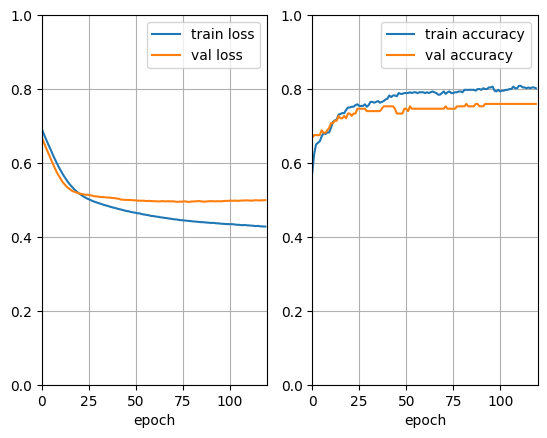

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.grid(True)
plt.xlim([0,120])
plt.ylim([0,1.0])
plt.xlabel('epoch')

fig.add_subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.grid(True)
plt.xlim([0,120])
plt.ylim([0,1.0])
plt.xlabel('epoch')

You can see that both the training loss and validation loss decrease rapidly before 25 epochs. After that the gap between training loss and validation loss get larger, which means the model starts to overfit. In our later lectures, we will talk about what overfitting is, what causes overfitting and how to prevent overfitting when training deep learning models.

In this particular case, the model looks like it performed better on the validation set than on the training set at the beginning of training. But that's not the case. Indeed, the validation loss is computed at the *end* of each epoch, while the training loss is computed *during* each epoch. So the training curve should be shifted by half an epoch to the left. If you do that, you will see the training and validation curves overlap almost perfectly at the beginning of training.

## 5. Evaluate the model
Once you are satisfied with your model's validation accuracy, you may evaluate the performance on the test set to estimate how the model generalize to new data. You can easily do this using the `evaluate()` method. The first output of `evaluate()` method is the loss of the model, and the second is the accuracy of the model.

In [18]:
# evaluate the model on both the test set
_,accuracy = model.evaluate(X_test,y_test)
print('Accuracy on the test set: %.2f' % (accuracy*100))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8196 - loss: 0.4485 
Accuracy on the test set: 80.52


You could also use the `predict()` method to make predictions on new instances. The `predict()` outputs the likelihood of the diabetes. You need get the output class (0 or 1) by thresholding the probability with 0.5.

In [42]:
y_predict = (model.predict(X_test) > 0.5).astype("int32")
for i in range(10):
    print(f'{(X_test[i]).tolist()} => {y_predict[i][0]} (expected {y_test[i]})')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
[-0.8354354969841159, 2.4573590260372535, 0.3467431597703781, 1.3950740095371392, -0.6996567372359558, 1.3522451320376832, 2.7859441674361065, -0.9656918919706856] => 1 (expected 1.0)
[-0.5448080776366672, -0.4371963301807875, 0.24436263555830207, 0.5845724632728228, 0.15216202200991366, 0.17619533491603662, -0.18763809923801236, -0.8824028314748293] => 0 (expected 0.0)
[0.036446761058230505, -1.4125356349933882, -0.3699205097141541, -1.2858157204140617, -0.6996567372359558, 0.2267781218890105, -0.2266851391034301, -0.7158247104831167] => 0 (expected 0.0)
[0.3270741804056793, 1.41909460478513, 0.14198211134622604, -0.10123653741236822, 0.7910260914443157, -0.8101690110569577, 0.36202407732902164, 1.4496908624091467] => 1 (expected 1.0)
[-1.1260629163315647, -0.31134609730174223, -0.21634972339604003, -1.2858157204140617, -0.6996567372359558, -0.9619173719758798, 0.5812882242655983, -0.21609034750797898] => 0 (expected 0.0)
[-0.8354354969841159, -1.2

In [37]:
numeros = [3.14159, 2.71828, 1.41421, 0.57721]
print([f"{num:.2f} =>" for num in numeros])

['3.14 =>', '2.72 =>', '1.41 =>', '0.58 =>']
